In [63]:
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.graphics as g
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

# Problem 4e

Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [5]:
US = pd.read_csv('../data/us_rep_elections.csv')

In [15]:
US

,district,name,party,incumbent,winner,raised,spent
0,AL01,Jerry Carl,R,False,True,1971321,1859349
1,AL01,James Averhart,D,False,False,80095,78973
2,AL02,Barry Moore,R,False,True,650807,669368
3,AL02,Phyllis Harvey-Hall,D,False,False,56050,55988
4,AL03,Mike D Rogers,R,True,True,1193111,1218564
...,...,...,...,...,...,...,...
889,WI07,Tricia Zunker,D,False,False,1261957,1232690
890,WI08,Mike Gallagher,R,True,True,3202905,2841801
891,WI08,Amanda Stuck,D,False,False,416978,399916
892,WY01,Liz Cheney,R,True,True,3003883,3060167


<AxesSubplot:xlabel='incumbent', ylabel='raised'>

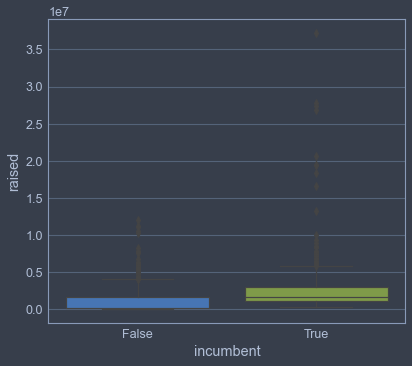

In [20]:
sns.boxplot(x="incumbent", y="raised", data=US)

C:\Users\jrior\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='incumbent', ylabel='raised'>

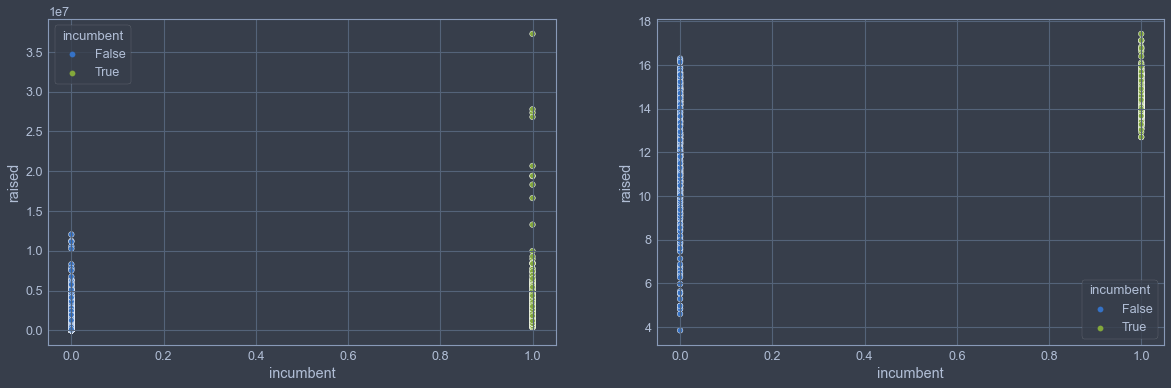

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20, 6))
sns.scatterplot(x="incumbent", y="raised", data=US, ax = ax1, hue = 'incumbent')
sns.scatterplot(x="incumbent", y=np.log(US["raised"]), data=US, ax = ax2, hue = 'incumbent')

C:\Users\jrior\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jrior\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


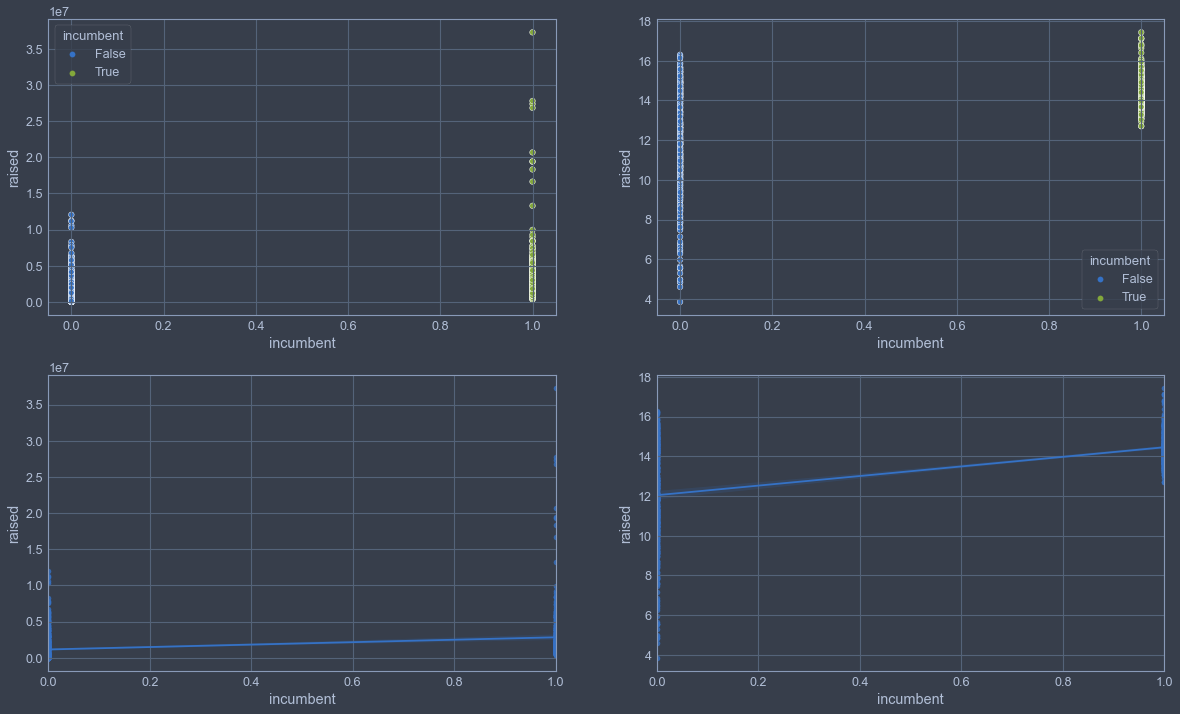

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (20, 12))

sns.scatterplot(x="incumbent", y="raised", data=US, ax = ax1, hue = 'incumbent');
sns.scatterplot(x="incumbent", y=np.log(US["raised"]), data=US, ax = ax2, hue = 'incumbent');

sns.regplot(x="incumbent", y="raised", data=US, ax = ax3);
sns.regplot(x="incumbent", y=np.log(US["raised"]), data=US, ax = ax4);

C:\Users\jrior\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='incumbent', ylabel='raised'>

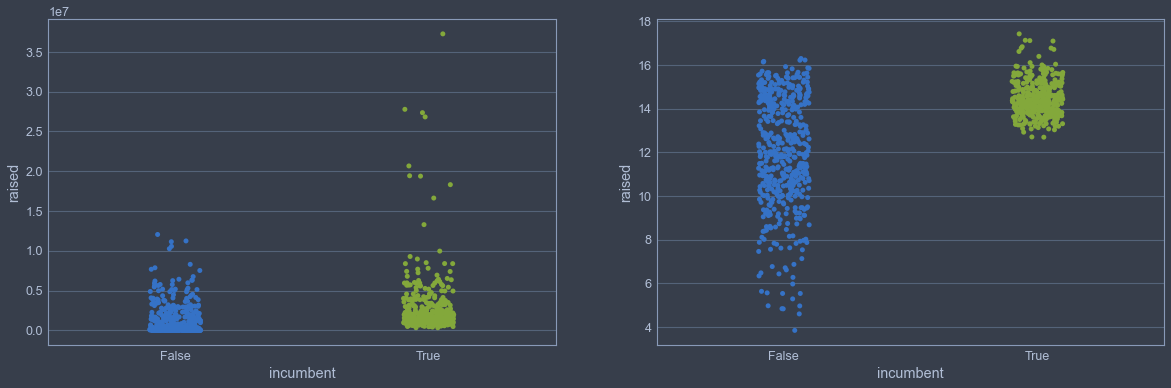

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20, 6))
sns.stripplot(x="incumbent", y="raised", data=US, ax = ax1)
sns.stripplot(x="incumbent", y=np.log(US["raised"]), data=US, ax = ax2)

C:\Users\jrior\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='raised', ylabel='Count'>

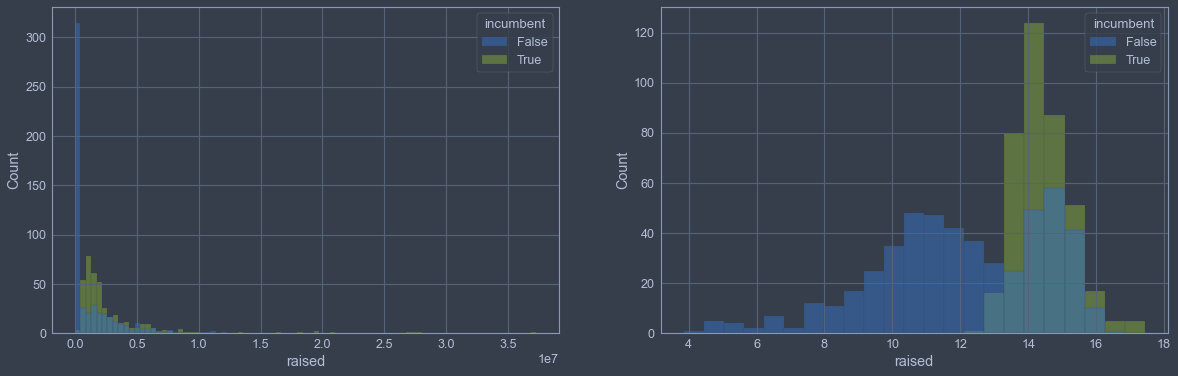

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20, 6))

sns.histplot(x = "raised", data=US, hue = 'incumbent', ax = ax1)
sns.histplot(x = np.log(US["raised"]), data=US, hue = 'incumbent', ax = ax2)

## Model Choice

Because our target variable is continuous (kinda), we'll use linear regression. The 'Incumbent' column is already a boolean, meaning its values will be used as 0 or 1 when building our model.

## Base Model

Here we construct a base model for comparative reference.

In [53]:
lin_reg_base = (sm.GLM(endog = US['raised'],
                       exog = sm.add_constant(US[[]]),
                       family = sm.families.Gaussian()
                      )
                .fit()
               )

print(lin_reg_base.summary(), '\n', 'Base AIC: '+str(lin_reg_base.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 raised   No. Observations:                  894
Model:                            GLM   Df Residuals:                      893
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                      9.1565e+12
Method:                          IRLS   Log-Likelihood:                -14609.
Date:                Sat, 16 Oct 2021   Deviance:                   8.1767e+15
Time:                        12:40:04   Pearson chi2:                 8.18e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.866e+06   1.01e+05     18.434      0.0

## Linear Regression Model

Here we construct the linear regression model. Note that the AIC is better (lower) than the base model's, if only slightly.

In [55]:
lin_reg_incumb = (sm.GLM(endog = US['raised'],
                       exog = sm.add_constant(US['incumbent'].astype('int')),
                       family = sm.families.Gaussian()
                      )
                .fit()
               )

print(lin_reg_incumb.summary(), '\n', 'Incumbent AIC: '+str(lin_reg_incumb.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 raised   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      8.4710e+12
Method:                          IRLS   Log-Likelihood:                -14574.
Date:                Sat, 16 Oct 2021   Deviance:                   7.5561e+15
Time:                        12:40:34   Pearson chi2:                 7.56e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+06   1.29e+05      8.823      0.0

In [69]:
# results = smf.ols("raised ~ incumbent", data = US).fit()

# g.regressionplots.plot_ccpr(results, exog_idx = 'incumbent')
# plt.show()

## Logarithmic Regression

Here we construct a log-transformed linear regression. The AIC is the same, but the coefficients now give us information about multiplicative relationships rather than additive ones.

In [59]:
US_clean = US[US['raised'] > 0]

lin_reg_log_incumb = (sm.GLM(endog = np.log(US_clean['raised']),
                       exog = sm.add_constant(US_clean['incumbent'].astype('int')),
                       family = sm.families.Gaussian()
                      )
                .fit()
               )

print(lin_reg_log_incumb.summary(), '\n', 'Log-Incumbent AIC: '+str(lin_reg_incumb.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 raised   No. Observations:                  893
Model:                            GLM   Df Residuals:                      891
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          3.8723
Method:                          IRLS   Log-Likelihood:                -1870.6
Date:                Sat, 16 Oct 2021   Deviance:                       3450.2
Time:                        12:43:51   Pearson chi2:                 3.45e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0415      0.087    137.784      0.0